In [1]:
import warnings
warnings.filterwarnings('ignore')

import urllib, json
from urllib.request import urlopen
import numpy as np
from io import open
import ast
import time
import requests
import pandas as pd

from IPython.core.display import HTML,display
display(HTML("<style>.container { width:85% !important; }</style>"))

%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'


from collections import Counter

In [2]:
w = np.load("um_openalex.npy", allow_pickle=True)

In [3]:
um_staff = {2004:798, 2005:934, 2006: 1022, 2007: 1037, 2008: 1040, 2009: 923, 2010: 865, 2011: 907, 2012: 869, 2013: 860,
            2014: 871, 2015: 889, 2016: 888, 2017: 908, 2018: 915, 2019: 940, 2020: 940, 2021: 960, 2022: 977, 2023: 1004}

In [182]:
work_year = {}
cit_year = {}
for work in w:
    if work["publication_year"] >= 2004 and work["publication_year"] <= 2023:
        if work["publication_year"] not in work_year:
            work_year[work["publication_year"]] = 1
            cit_year[work["publication_year"]] = work["cited_by_count"]
        else:
            work_year[work["publication_year"]] += 1
            cit_year[work["publication_year"]] += work["cited_by_count"]

In [183]:
work_year, cit_year

({2012: 844,
  2006: 557,
  2019: 1234,
  2009: 668,
  2005: 540,
  2017: 1078,
  2014: 993,
  2013: 923,
  2004: 461,
  2007: 650,
  2011: 854,
  2016: 992,
  2020: 1368,
  2015: 972,
  2008: 640,
  2018: 1169,
  2010: 789,
  2022: 1512,
  2021: 1607,
  2023: 1392},
 {2012: 23994,
  2006: 15094,
  2019: 18168,
  2009: 19697,
  2005: 16362,
  2017: 16939,
  2014: 26727,
  2013: 22770,
  2004: 11422,
  2007: 18638,
  2011: 19704,
  2016: 19467,
  2020: 21931,
  2015: 19046,
  2008: 16564,
  2018: 19549,
  2010: 17507,
  2022: 9793,
  2021: 16181,
  2023: 5204})

In [184]:
# work_year um_staff ratio
work_year_staff_ratio = {}
cit_year_staff_ratio = {}
for year in work_year:
    if year in um_staff:
        work_year_staff_ratio[year] = work_year[year] / um_staff[year]
        cit_year_staff_ratio[year] = cit_year[year] / um_staff[year]


In [162]:
work_year_staff_ratio

{2012: 0.9712313003452244,
 2006: 0.5450097847358122,
 2019: 1.3127659574468085,
 2009: 0.723726977248104,
 2005: 0.5781584582441114,
 2017: 1.1872246696035242,
 2014: 1.140068886337543,
 2013: 1.0732558139534885,
 2004: 0.5776942355889725,
 2007: 0.626808100289296,
 2011: 0.9415656008820287,
 2016: 1.117117117117117,
 2020: 1.4553191489361703,
 2015: 1.0933633295838021,
 2008: 0.6153846153846154,
 2018: 1.2775956284153005,
 2010: 0.9121387283236995,
 2022: 1.5475946775844422,
 2021: 1.6739583333333334,
 2023: 1.3864541832669324}

Text(0, 0.5, 'Razmerje št. objav in zaposlenih')

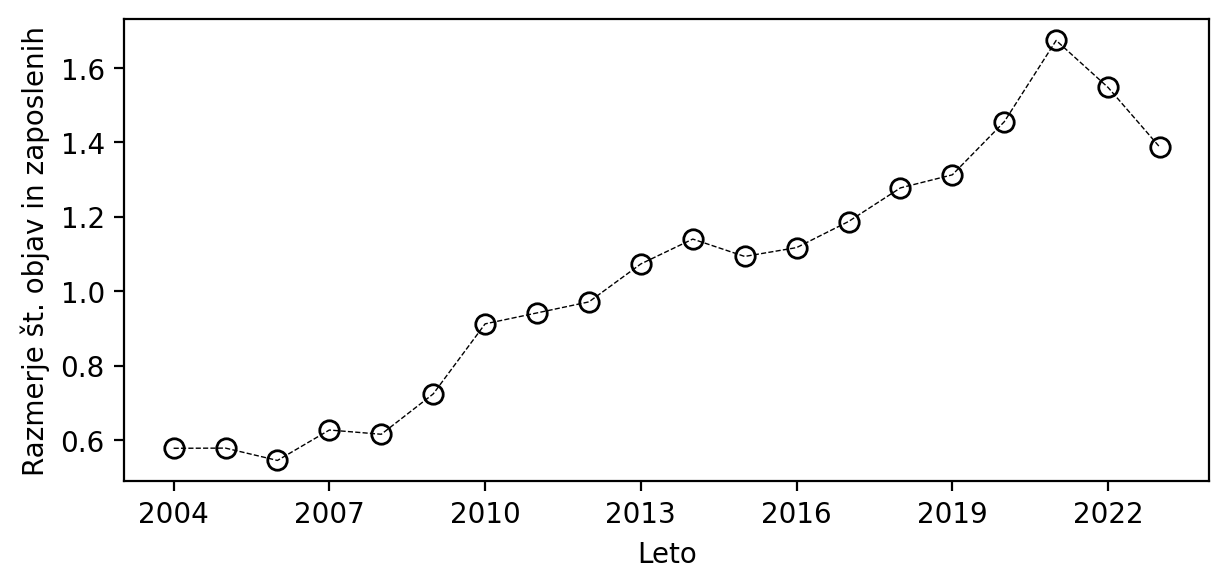

In [189]:
# plot work_year_staff_ratio, first sort data by year
work_year_staff_ratio = dict(sorted(work_year_staff_ratio.items(), key=lambda item: item[0]))
# plot work_year_staff_ratio
plt.figure(figsize=(7, 3))
plt.plot(list(work_year_staff_ratio.keys()), list(work_year_staff_ratio.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('Leto')
plt.ylabel('Razmerje št. objav in zaposlenih')




Text(0, 0.5, 'Razmerje št. citatov in zaposlenih')

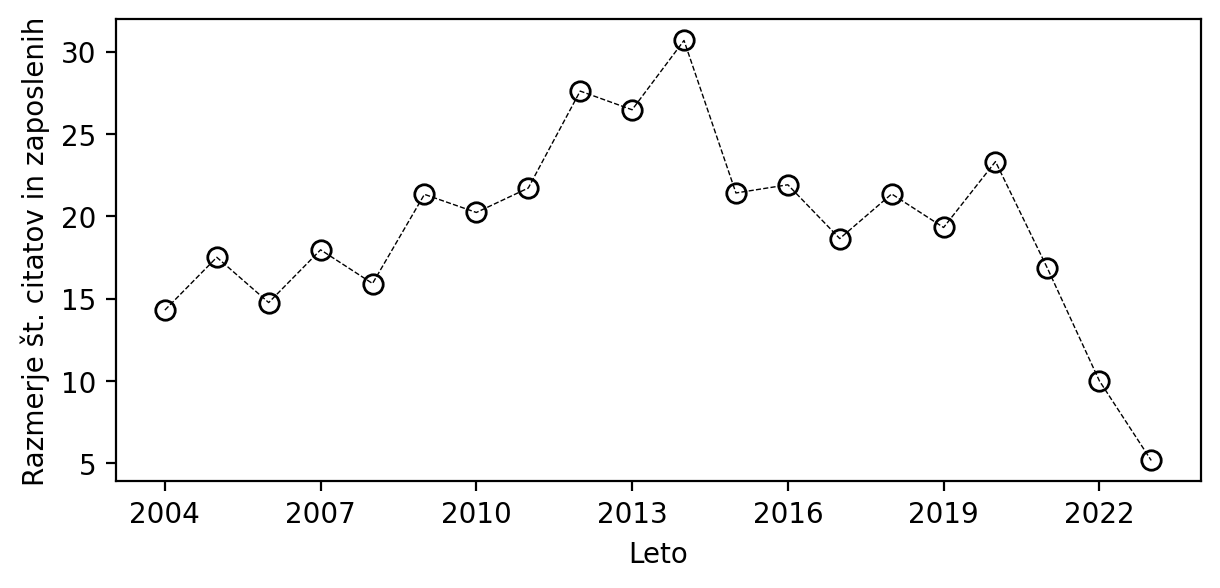

In [190]:
cit_year_staff_ratio = dict(sorted(cit_year_staff_ratio.items(), key=lambda item: item[0]))
plt.figure(figsize=(7, 3))
plt.plot(list(cit_year_staff_ratio.keys()), list(cit_year_staff_ratio.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('Leto')
plt.ylabel('Razmerje št. citatov in zaposlenih')

Text(0, 0.5, 'Razmerje št. citatov in št. objav')

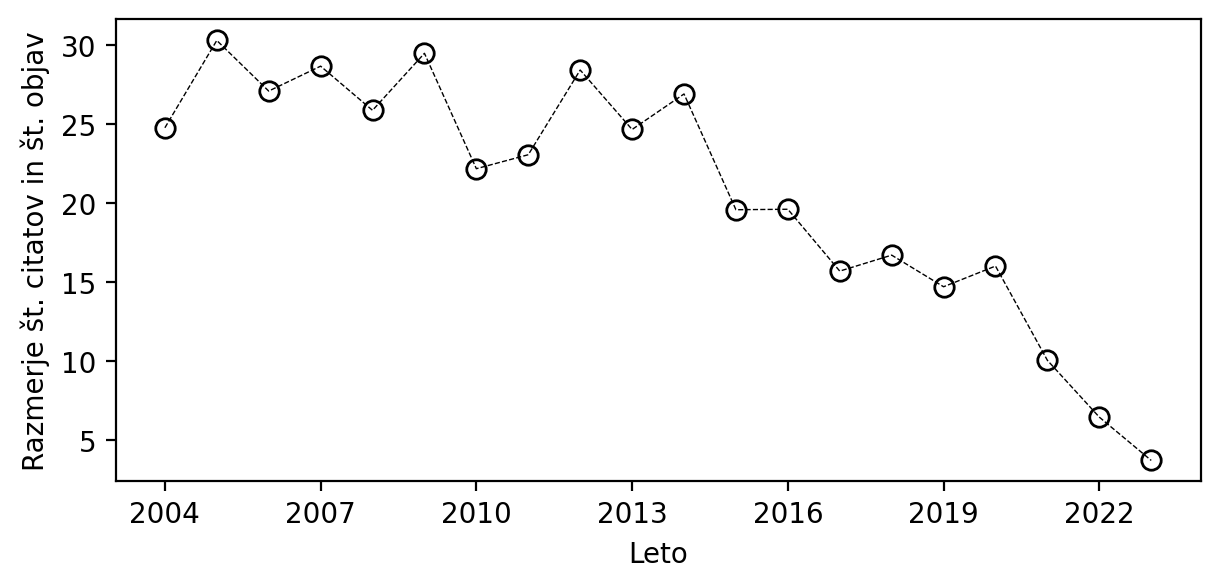

In [191]:
# plot work_year cit_year ratio
work_year_cit_year_ratio = {}
for year in work_year:
    work_year_cit_year_ratio[year] = cit_year[year] / work_year[year]

work_year_cit_year_ratio = dict(sorted(work_year_cit_year_ratio.items(), key=lambda item: item[0]))
plt.figure(figsize=(7, 3))
plt.plot(list(work_year_cit_year_ratio.keys()), list(work_year_cit_year_ratio.values()), marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=7)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('Leto')
plt.ylabel('Razmerje št. citatov in št. objav')

Text(0, 0.5, 'št. citatov/št. objav/zaposlenega')

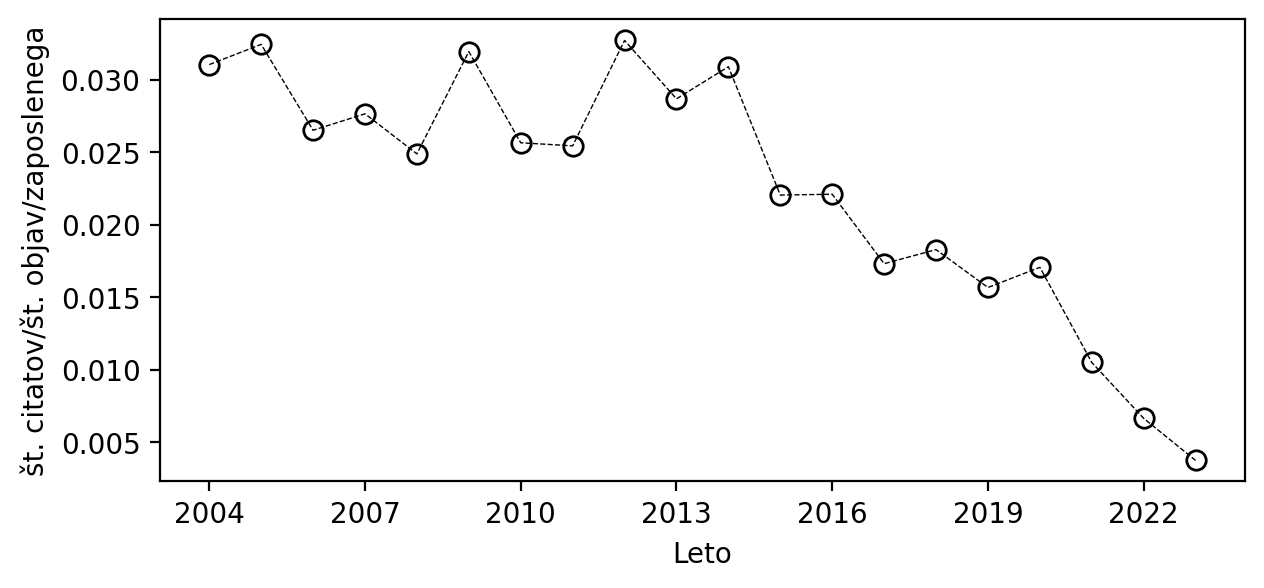

In [193]:
# plot work_year cit_year staff ratio
work_year_cit_year_staff_ratio = {}
for year in work_year:
    work_year_cit_year_staff_ratio[year] = work_year_cit_year_ratio[year] / um_staff[year]

work_year_cit_year_staff_ratio = dict(sorted(work_year_cit_year_staff_ratio.items(), key=lambda item: item[0]))
plt.figure(figsize=(7, 3))
plt.plot(list(work_year_cit_year_staff_ratio.keys()), list(work_year_cit_year_staff_ratio.values()), marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=7)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('Leto')
plt.ylabel('št. citatov/št. objav/zaposlenega')

(0.1, 4.2)

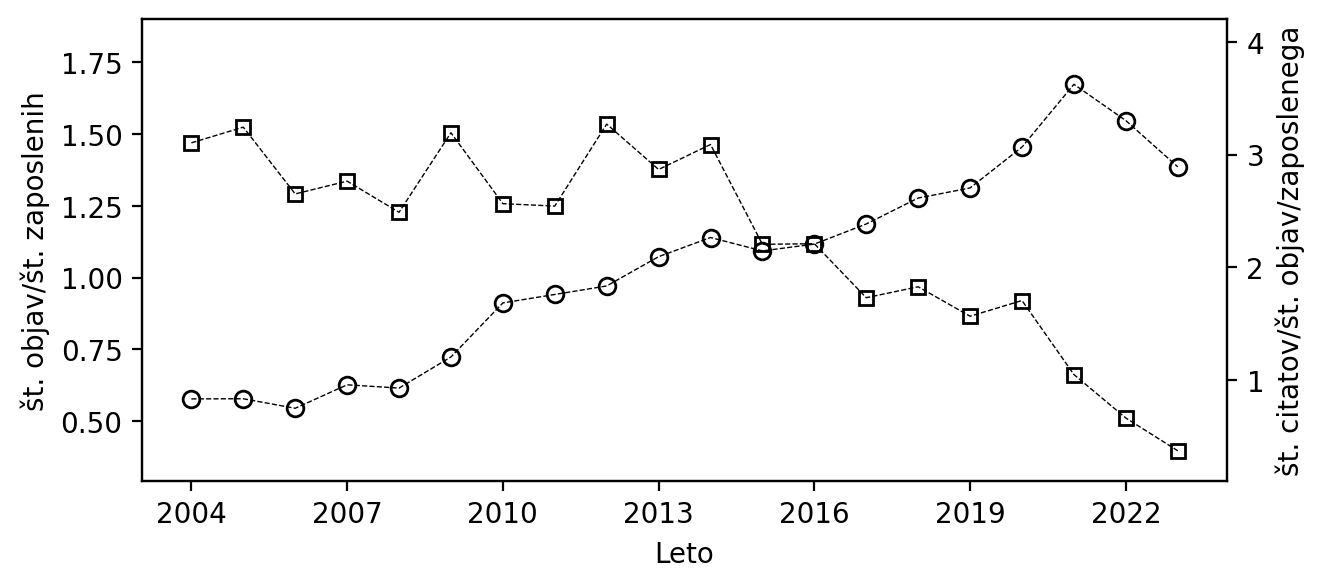

In [220]:
# plot work_year_staff_ratio and work_year_cit_year_staff_ratio in one plot with two y axis
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
ax1.plot(list(work_year_staff_ratio.keys()), list(work_year_staff_ratio.values()), marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=6)
ax2.plot(list(work_year_cit_year_staff_ratio.keys()), 100*np.array(list((work_year_cit_year_staff_ratio.values()))), marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
ax1.set_xlabel('Leto')
ax1.set_ylabel('št. objav/št. zaposlenih', color='black')
ax2.set_ylabel('št. citatov/št. objav/zaposlenega', color='black')
# set lim for y axis
ax1.set_ylim(0.29, 1.9)
ax2.set_ylim(0.1, 4.2)


In [ ]:
############# FINAL FIGURE 1 #############

In [107]:
classifications = {}
domains = []
subfields = []
fields = []
for work in w:
    #if work["primary_topic"] and work["publication_year"] >= 1980 and work["publication_year"] <= 1990:
    if work["primary_topic"]:
        domain = work["primary_topic"]["domain"]["display_name"]
        domains.append(domain)
        subfield = work["primary_topic"]["subfield"]["display_name"]
        subfields.append(subfield)
        field = work["primary_topic"]["field"]["display_name"]
        fields.append(field)
        if domain not in classifications:
            classifications[domain] = {}
        else:    
            if field not in classifications[domain]:
                classifications[domain][field] = {}
            else:
                if subfield not in classifications[domain][field]:
                    classifications[domain][field][subfield] = 1
                else:
                    classifications[domain][field][subfield] += 1



In [109]:
classifications.keys()

dict_keys(['Life Sciences', 'Physical Sciences', 'Social Sciences', 'Health Sciences'])

In [112]:
classifications["Social Sciences"].keys()

dict_keys(['Social Sciences', 'Psychology', 'Decision Sciences', 'Business, Management and Accounting', 'Economics, Econometrics and Finance', 'Arts and Humanities'])

In [135]:
authors = []
author_count = []
lead_um_works_count = 0
lead_um_works = []
country_codes = []
for work in w:
    count_authors = 0
    for author in work['authorships']:
        count_authors += 1
        country_codes.append(author['countries'])
        if 'institutions' in author.keys():
            for institution in author['institutions']:
                if institution['display_name'] == 'University of Maribor':
                    if author['is_corresponding'] == True or author['author_position'] == 'first':
                    #if author['author_position'] == 'first':
                        authors.append(author['author']['display_name'])
                        lead_um_works_count += 1
                        lead_um_works.append(work)
    author_count.append(count_authors)

In [136]:
LS = []
PE = []
SSH = []
for work in lead_um_works:
    if work["primary_topic"]:
        domain = work["primary_topic"]["domain"]["display_name"]
        if domain == "Life Sciences" or domain == "Health Sciences":
            LS.append(work)
        elif domain == "Physical Sciences":
            PE.append(work)
        elif domain == "Social Sciences":
            SSH.append(work)

In [137]:
len(LS), len(PE), len(SSH)

(3408, 9929, 4280)

In [139]:
# sum LS+PE+SSH
len(LS)+len(PE)+len(SSH), len(lead_um_works)

(17617, 17785)

In [6]:
total_citations = 0
for work in w:
    total_citations += work['cited_by_count']

total_citations

406701

In [140]:
cit_LS = []
cit_PE = []
cit_SSH = []
for work in LS:
    cit_LS.append(work['cited_by_count'])
for work in PE:
    cit_PE.append(work['cited_by_count'])
for work in SSH:
    cit_SSH.append(work['cited_by_count'])


In [141]:
np.mean(cit_LS), np.mean(cit_PE), np.mean(cit_SSH)

(np.float64(18.315140845070424),
 np.float64(17.293584449592103),
 np.float64(10.888785046728971))

In [142]:
np.median(cit_LS), np.median(cit_PE), np.median(cit_SSH)

(np.float64(5.0), np.float64(5.0), np.float64(1.0))

In [31]:
authors = []
author_count = []
lead_um_works_count = 0
lead_um_works = []
country_codes = []
for work in w:
    count_authors = 0
    for author in work['authorships']:
        count_authors += 1
        country_codes.append(author['countries'])
        if 'institutions' in author.keys():
            for institution in author['institutions']:
                if institution['display_name'] == 'University of Maribor':
                    if author['is_corresponding'] == True or author['author_position'] == 'first':
                    #if author['author_position'] == 'first':
                        authors.append(author['author']['display_name'])
                        lead_um_works_count += 1
                        lead_um_works.append(work)
    author_count.append(count_authors)


In [147]:
np.mean(author_count), np.median(author_count)

(np.float64(6.384019055868341), np.float64(3.0))

In [26]:
lead_um_works_count

17785

In [28]:
lead_um_works[1]

{'id': 'https://openalex.org/W2000929155',
 'doi': 'https://doi.org/10.1016/j.biosystems.2009.10.003',
 'title': 'Coevolutionary games—A mini review',
 'display_name': 'Coevolutionary games—A mini review',
 'publication_year': 2009,
 'publication_date': '2009-10-17',
 'ids': {'openalex': 'https://openalex.org/W2000929155',
  'doi': 'https://doi.org/10.1016/j.biosystems.2009.10.003',
  'mag': '2000929155',
  'pmid': 'https://pubmed.ncbi.nlm.nih.gov/19837129'},
 'language': 'en',
 'primary_location': {'is_oa': False,
  'landing_page_url': 'https://doi.org/10.1016/j.biosystems.2009.10.003',
  'pdf_url': None,
  'source': {'id': 'https://openalex.org/S99347777',
   'display_name': 'Biosystems',
   'issn_l': '0303-2647',
   'issn': ['0303-2647', '1872-8324'],
   'is_oa': False,
   'is_in_doaj': False,
   'is_core': True,
   'host_organization': 'https://openalex.org/P4310320990',
   'host_organization_name': 'Elsevier BV',
   'host_organization_lineage': ['https://openalex.org/P4310320990']

In [38]:
country_codes = [item for sublist in country_codes for item in sublist]

In [39]:
Counter(country_codes)

Counter({'SI': 58961,
         'JP': 17395,
         'US': 9223,
         'KR': 8246,
         'RU': 6979,
         'DE': 5830,
         'TW': 4030,
         'IN': 3648,
         'AT': 3341,
         'PL': 2647,
         'CN': 2561,
         'AU': 2466,
         'ES': 2223,
         'HR': 2016,
         'GB': 1897,
         'IT': 1875,
         'RS': 1608,
         'CZ': 1462,
         'CH': 1053,
         'FR': 1008,
         'NL': 854,
         'HU': 704,
         'PT': 619,
         'SE': 543,
         'TR': 542,
         'BE': 523,
         'CA': 503,
         'GR': 499,
         'SA': 483,
         'RO': 477,
         'SK': 436,
         'DK': 433,
         'BR': 429,
         'IR': 410,
         'BA': 394,
         'NO': 329,
         'FI': 298,
         'UA': 228,
         'MY': 163,
         'IE': 158,
         'IL': 143,
         'ZA': 142,
         'SG': 139,
         'BG': 136,
         'KP': 136,
         'MK': 136,
         'PK': 132,
         'ME': 112,
         'LT': 111

In [7]:
w[2]['primary_location']['source']['display_name']

'Scientific Reports'

In [ ]:
############## podatki po desetletjih ##############

In [341]:
c1 = 0
c2 = 0
c3 = 0
c4 = 0
for work in w:
    if work["publication_year"] <= 2000:
        c1 += 1
    if work["publication_year"] >= 2000 and work["publication_year"] <= 2010:
        c2 += 1
    if work["publication_year"] >= 2010 and work["publication_year"] <= 2020:
        c3 += 1
    if work["publication_year"] >= 2020:
        c4 += 1

print(c1, c2, c3, c4)
print(np.array([c1,c2,c3,c4])/(c1+c2+c3+c4))

TypeError: string indices must be integers, not 'str'

In [316]:
c1 = 0
c2 = 0
c3 = 0
c4 = 0
for work in PE:
    if work["publication_year"] <= 1990:
        c1 += 1
    if work["publication_year"] >= 1991 and work["publication_year"] <= 2000:
        c2 += 1
    if work["publication_year"] >= 2001 and work["publication_year"] <= 2010:
        c3 += 1
    if work["publication_year"] >= 2011:
        c4 += 1

print(c1, c2, c3, c4)
print(np.array([c1,c2,c3,c4])/(c1+c2+c3+c4))

c1 = 0
c2 = 0
c3 = 0
c4 = 0
for work in LS:
    if work["publication_year"] <= 1990:
        c1 += 1
    if work["publication_year"] >= 1991 and work["publication_year"] <= 2000:
        c2 += 1
    if work["publication_year"] >= 2001 and work["publication_year"] <= 2010:
        c3 += 1
    if work["publication_year"] >= 2011:
        c4 += 1

print(c1, c2, c3, c4)
print(np.array([c1,c2,c3,c4])/(c1+c2+c3+c4))

c1 = 0
c2 = 0
c3 = 0
c4 = 0
for work in SSH:
    if work["publication_year"] <= 1990:
        c1 += 1
    if work["publication_year"] >= 1991 and work["publication_year"] <= 2000:
        c2 += 1
    if work["publication_year"] >= 2001 and work["publication_year"] <= 2010:
        c3 += 1
    if work["publication_year"] >= 2011:
        c4 += 1

print(c1, c2, c3, c4)
print(np.array([c1,c2,c3,c4])/(c1+c2+c3+c4))


103 729 2808 6289
[0.01037365 0.07342129 0.28280794 0.63339712]
20 117 631 2640
[0.00586854 0.03433099 0.18515258 0.77464789]
22 127 685 3446
[0.00514019 0.0296729  0.16004673 0.80514019]


In [395]:

num_cit = {}
num_works = {}
for year in range(1975, 2024):
    for work in lead_um_works:
        if work["publication_year"] == year:
            if year not in num_works:
                num_works[year] = 1
                num_cit[year] = work["cited_by_count"]
            else:
                num_works[year] += 1
                num_cit[year] += work["cited_by_count"]

In [290]:
concepts0 = {}
concepts1 = {}
concepts2 = {}
concepts3 = {}
for work in SSH:
    if work["concepts"] and work["publication_year"] <= 1990:
        concept_list = work["concepts"]
        for c in concept_list:
            concept = c["display_name"]
            level = c["level"]
            if level == 0:
                if concept not in concepts0:
                    concepts0[concept] = 1
                else:
                    concepts0[concept] += 1
            if level == 1:
                if concept not in concepts1:
                    concepts1[concept] = 1
                else:
                    concepts1[concept] += 1
            if level == 2:
                if concept not in concepts2:
                    concepts2[concept] = 1
                else:
                    concepts2[concept] += 1
            if level == 3:
                if concept not in concepts3:
                    concepts3[concept] = 1
                else:
                    concepts3[concept] += 1

In [291]:
# sort concepts by value
concepts0 = dict(sorted(concepts0.items(), key=lambda item: item[1], reverse=True))
concepts1 = dict(sorted(concepts1.items(), key=lambda item: item[1], reverse=True))
concepts2 = dict(sorted(concepts2.items(), key=lambda item: item[1], reverse=True))
concepts3 = dict(sorted(concepts3.items(), key=lambda item: item[1], reverse=True))

In [292]:
concepts1

{'Law': 7,
 'Epistemology': 5,
 'Marketing': 3,
 'Cognitive psychology': 2,
 'Neuroscience': 2,
 'Process management': 2,
 'Computer security': 2,
 'Linguistics': 2,
 'Finance': 2,
 'Knowledge management': 2,
 'Mechanical engineering': 2,
 'Operating system': 2,
 'Management science': 2,
 'Humanities': 2,
 'Management': 2,
 'Social psychology': 1,
 'Communication': 1,
 'Econometrics': 1,
 'Operations management': 1,
 'Computer vision': 1,
 'Industrial organization': 1,
 'Macroeconomics': 1,
 'Pedagogy': 1,
 'Public relations': 1,
 'Business administration': 1,
 'Economic history': 1,
 'Aeronautics': 1,
 'Risk analysis (engineering)': 1,
 'Psychiatry': 1,
 'Aerospace engineering': 1,
 'Forensic engineering': 1,
 'Criminology': 1,
 'Botany': 1,
 'Acoustics': 1,
 'Quantum mechanics': 1,
 'Engineering ethics': 1,
 'Cognitive science': 1,
 'Law and economics': 1,
 'Oceanography': 1,
 'Engineering management': 1,
 'Biochemistry': 1}

In [302]:
institutions = {}
for work in PE:
    for author in work['authorships']:
        if 'institutions' in author.keys():
            for institution in author['institutions']:
                if institution['display_name'] not in institutions:
                    institutions[institution['display_name']] = 1
                else:
                    institutions[institution['display_name']] += 1

In [303]:
institutions = dict(sorted(institutions.items(), key=lambda item: item[1], reverse=True))

In [304]:
institutions

{'University of Maribor': 24126,
 'University of Ljubljana': 1149,
 'Jožef Stefan Institute': 815,
 'Institute of Mathematics, Physics, and Mechanics': 538,
 'Graz University of Technology': 260,
 'National Institute of Chemistry': 195,
 'University of Belgrade': 138,
 'University of Graz': 131,
 'University of Primorska': 130,
 'University of Zagreb': 128,
 'University of Pennsylvania': 97,
 'Institute for Environmental Protection and Sensors': 97,
 'Zlatarna Celje (Slovenia)': 95,
 'University Clinical Centre Maribor': 81,
 'University of Novi Sad': 75,
 'University of Warsaw': 72,
 'Jožef Stefan International Postgraduate School': 70,
 'Institute of Metals and Technology': 62,
 'University of Split': 59,
 'PoliMaT Centre of Excellence (Slovenia)': 56,
 'Faculty (United Kingdom)': 55,
 'Complexity Science Hub Vienna': 53,
 'University of Nova Gorica': 53,
 'Institute of Physics': 52,
 'Montanuniversität Leoben': 51,
 'RWTH Aachen University': 51,
 'Technical University of Denmark': 4